# Morphological polycentricity

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
import seaborn as sns


medium_font = fm.FontProperties(fname =  "D:/bachelors/datasets/viz/Roboto-Medium.ttf", size = 12)
regluar_font = fm.FontProperties(fname = "D:/bachelors/datasets/viz/Roboto-Regular.ttf", size = 12)

colors = {
    'peach' : '#FCB886',
    'blue' : '#6FC7F7',
    'green' : '#78AF34',
    'red' : '#D25B5B',
    'grey' : '#8B8B8B'
}

## import data

In [2]:
os.chdir('D:/bachelors/datasets/')

In [15]:
def plot_morpho(nodes, year):
#     nodes = nodes[:340]
    plt.figure(figsize = (7,7), dpi = 192)

    plt.plot(
        nodes['flow_cent'].sort_values(ascending = False).values / nodes['flow_cent'].max(), color = colors['peach'],
        label = 'Фактическое распределение'
    )
    plt.plot(
        [1/ (i+1) for i in range(len(nodes))], color = colors['green'],
        label = 'Идеальное распределение'
    )
    plt.yscale('log')

    plt.yticks(fontproperties = regluar_font)
    plt.ylabel('Индекс центральности (нормированный)', fontproperties = medium_font)

    plt.xticks(fontproperties = regluar_font)
    plt.xlabel('Ранг', fontproperties = medium_font)

    plt.grid()

    plt.xlim(0, 380)
    plt.ylim(10 ** -3, 1)

    plt.legend(prop = regluar_font, frameon = False, bbox_to_anchor = (1,-0.075), ncol = 2)
    plt.tight_layout()
    plt.savefig(f'analysis/morpho_polycentricity/plots/morphology_{year}.png')

    plt.close('all')

In [16]:
for year in range(2004, 2018):
    nodes = pd.read_csv(f'analysis/yearly_graphs_v2/total/nodes_total_{year}.csv')
    plot_morpho(nodes, year)

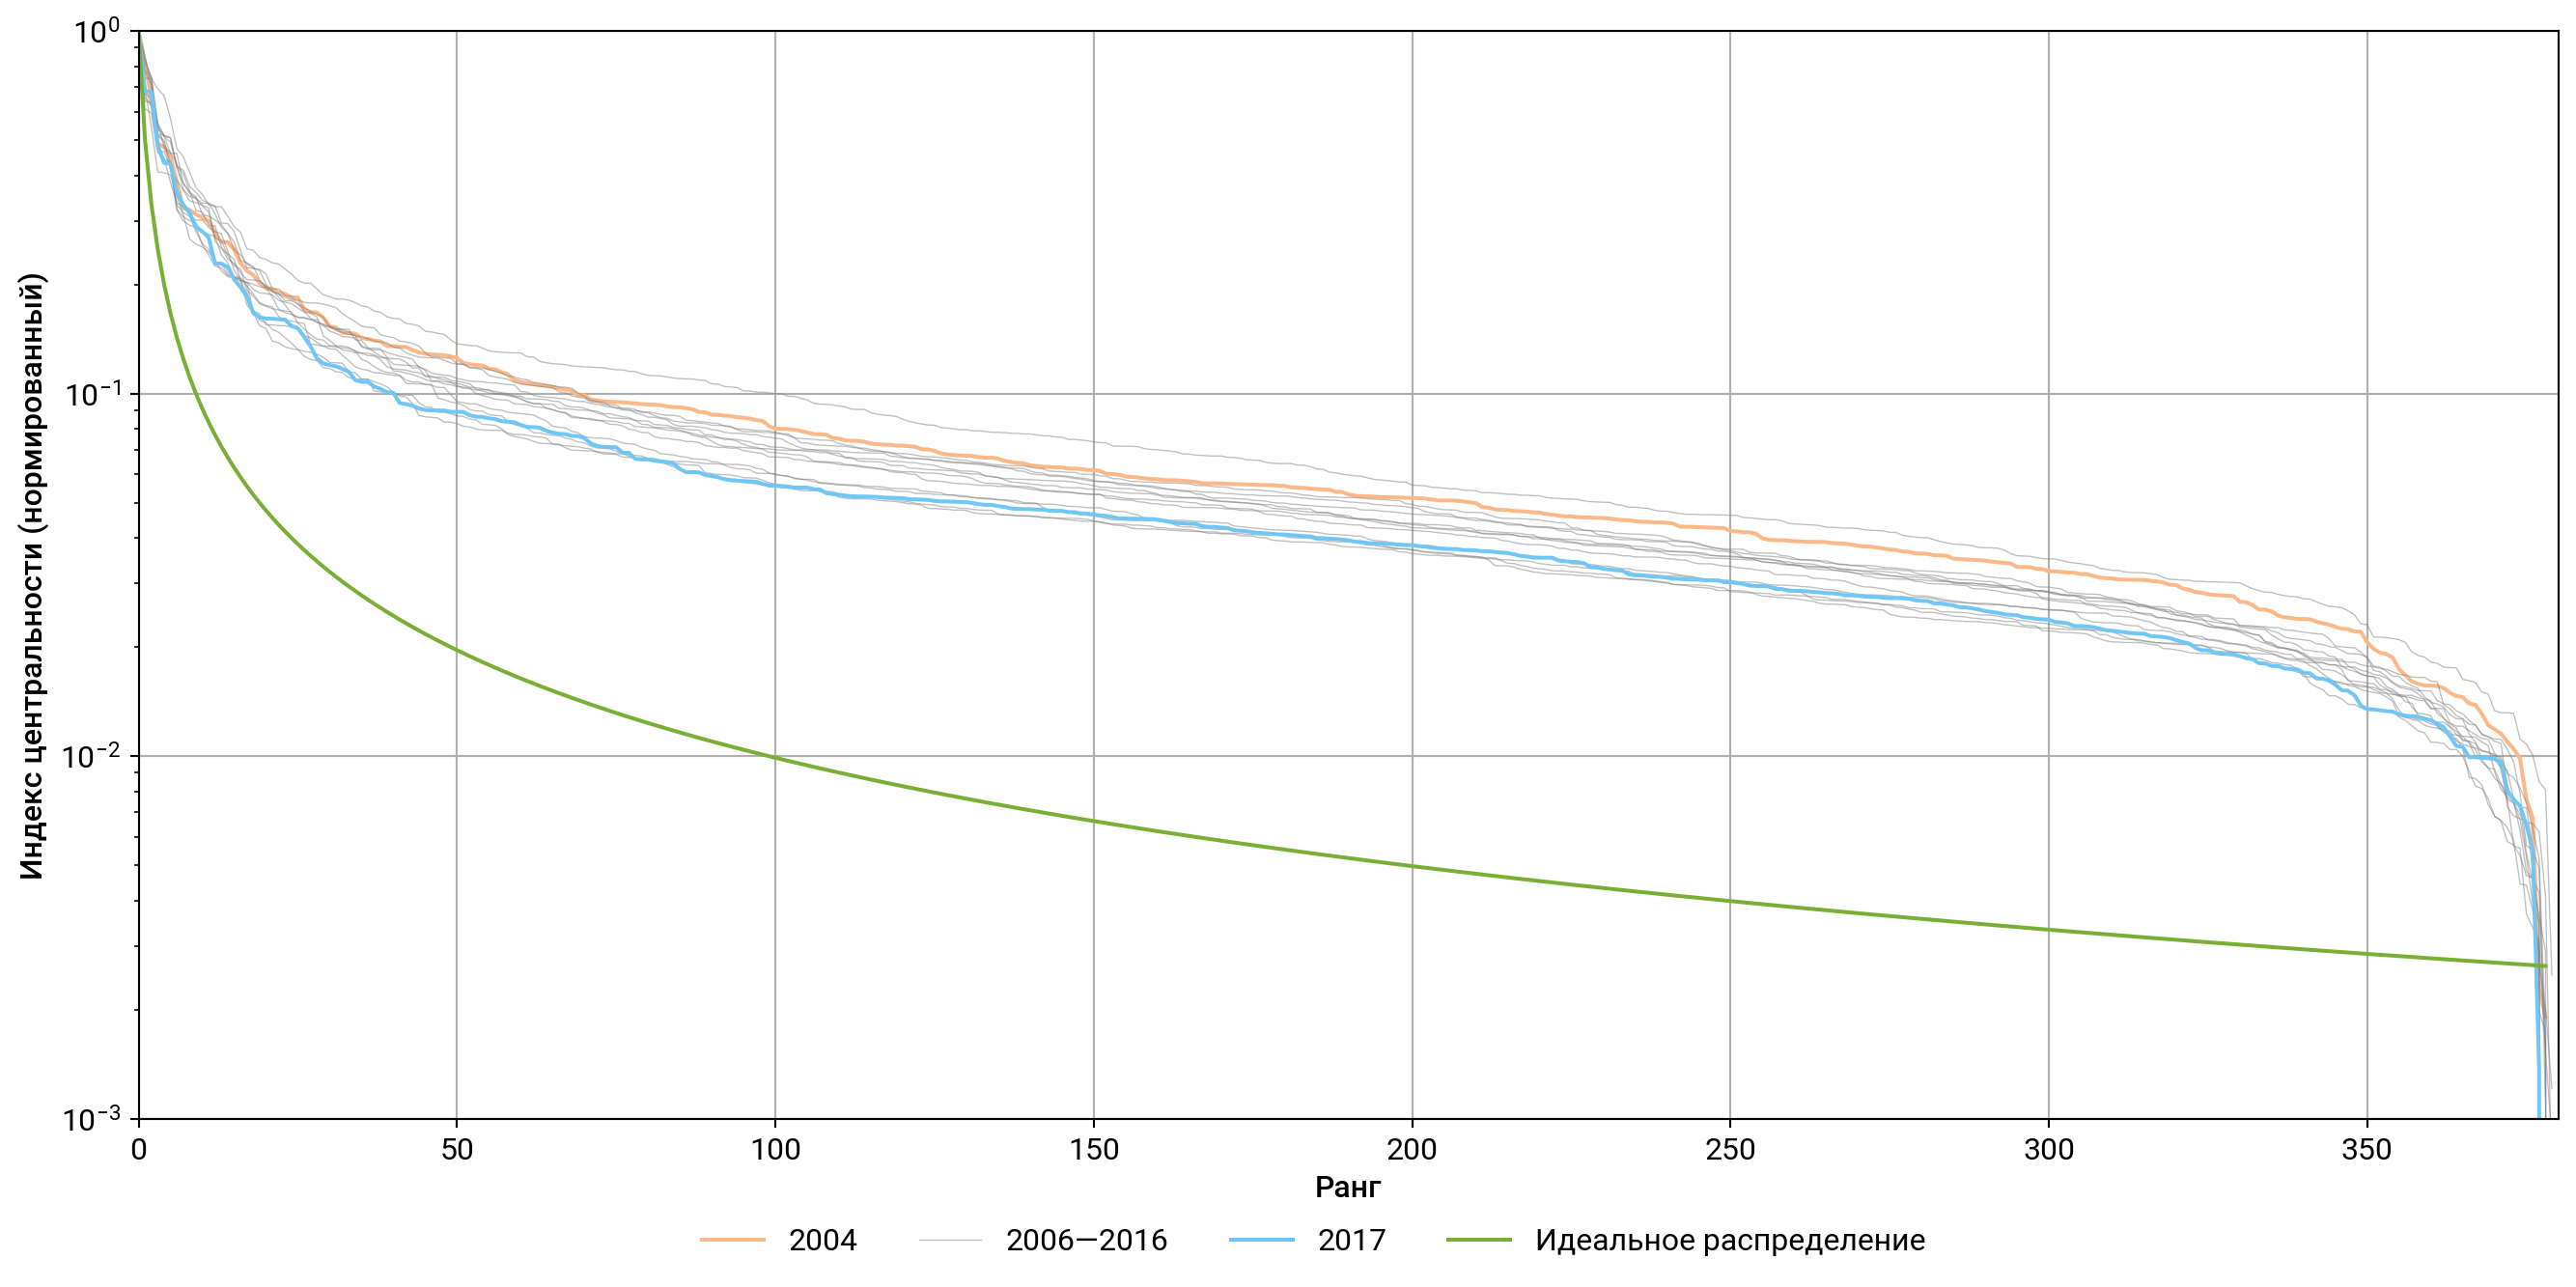

In [10]:
plt.figure(figsize = (14,7), dpi = 192)
series_list = []
series_communes_list = []
for year in range(2004, 2018):
    nodes = pd.read_csv(f'analysis/yearly_graphs_v2/total/nodes_total_{year}.csv')
    series = nodes['flow_cent'].sort_values(ascending = False).values / nodes['flow_cent'].max()
    series_list.append(series)
    series_communes = nodes.set_index('commune').sort_values(by = 'flow_cent', ascending = False).index
    series_communes_list.append(series_communes)
    if year == 2004:
        plt.plot(
            series, color = colors['peach'],
            label = f'{year}'
        )
    elif year == 2017:
        plt.plot(
            series, color = colors['blue'],
            label = f'{year}'
        )
    elif year == 2006:
        plt.plot(
            series, color = 'grey', label = '2006—2016',
            alpha = 0.5, lw = 0.5
        )
    else:
        plt.plot(
            series, color = 'grey',
            alpha = 0.5, lw = 0.5
        )
# nodes = pd.read_csv(f'analysis/yearly_graphs_v2/total/nodes_total_2017.csv')
# plt.plot(
#     nodes['flow_cent'].sort_values(ascending = False).values / nodes['flow_cent'].max(), color = colors['blue'],
#     label = '2017'
# )
plt.plot(
    [1/ (i+1) for i in range(len(nodes))], color = colors['green'],
    label = 'Идеальное распределение'
)
plt.yscale('log')

plt.yticks(fontproperties = regluar_font)
plt.ylabel('Индекс центральности (нормированный)', fontproperties = medium_font)

plt.xticks(fontproperties = regluar_font)
plt.xlabel('Ранг', fontproperties = medium_font)

plt.grid()

plt.xlim(0, 380)
plt.ylim(10 ** -3, 1)

plt.legend(prop = regluar_font, frameon = False, bbox_to_anchor = (0.75,-0.075), ncol = 4)
plt.tight_layout()

In [18]:
df_plotted = pd.concat([pd.Series(i) for i in series_list], axis= 'columns')
df_plotted.columns = [str(i) for i in range(2004, 2018)]

In [19]:
df_plotted_new = df_plotted.stack()

In [20]:
df_plotted_new.index = df_plotted_new.index.droplevel(1)
df_plotted_new.index.set_names(['Ранг'], inplace = True)

In [21]:
df_plotted_new = df_plotted_new.rename('Индекс центральности (нормированный)').reset_index()

In [22]:
import numpy as np

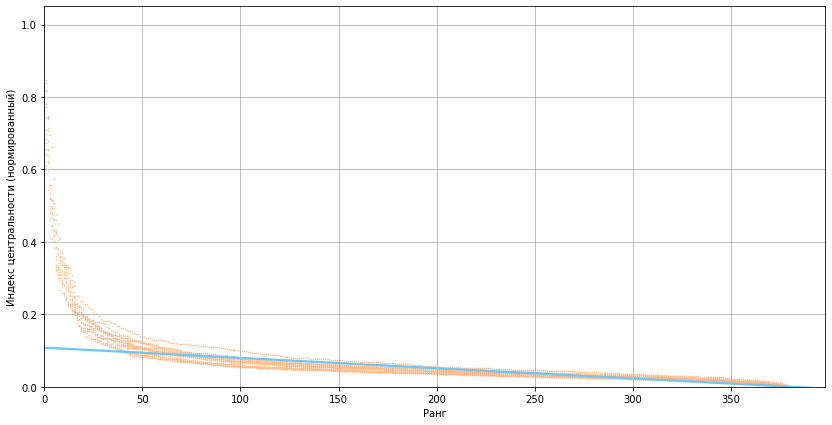

In [23]:
plt.figure(figsize = (14,7))

ax = sns.regplot(x = df_plotted_new['Ранг'], y = df_plotted_new['Индекс центральности (нормированный)'],
#             order = 5,
            robust = True,
            scatter_kws = {'s' : 0.5, 'color' : colors['peach']},
            line_kws = {'color' : colors['blue']})
ax.set_xlim(left = 0)
ax.set_ylim(bottom = 0)
# ax.set_yscale('log')
ax.grid()

In [24]:
df_communes = pd.concat([pd.Series(i) for i in series_communes_list], axis= 'columns')
df_communes.columns = [str(i) for i in range(2004, 2018)]

In [25]:
df_communes['nunique_communes'] = df_communes.apply(lambda row: row.nunique(), axis = 1)

In [26]:
df_communes.iloc[378].value_counts()

Schiermonnikoog    4
Vlieland           4
Rozendaal          4
5                  1
Onderbanken        1
Ameland            1
Name: 378, dtype: int64

In [27]:
df_plotted['max_min_diff'] = df_plotted.apply(lambda row: row.max() - row.min(), axis = 1)

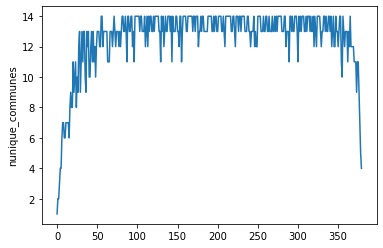

In [28]:
sns.lineplot(df_communes.index, df_communes['nunique_communes'])

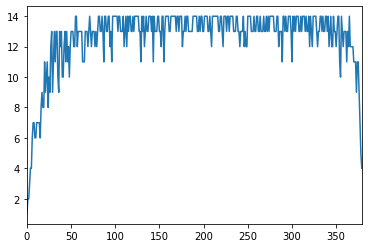

In [29]:
df_communes['nunique_communes'].plot()

In [30]:
df_communes['nunique_communes'] = df_communes['nunique_communes'].rolling(10).mean()

In [31]:
df_communes.loc[0, 'nunique_communes'] = 1

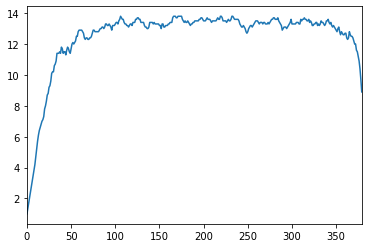

In [32]:
df_communes['nunique_communes'].interpolate().plot()

In [33]:
df_plot = pd.concat([df_communes['nunique_communes'].interpolate(), df_plotted['max_min_diff']], axis = 'columns')

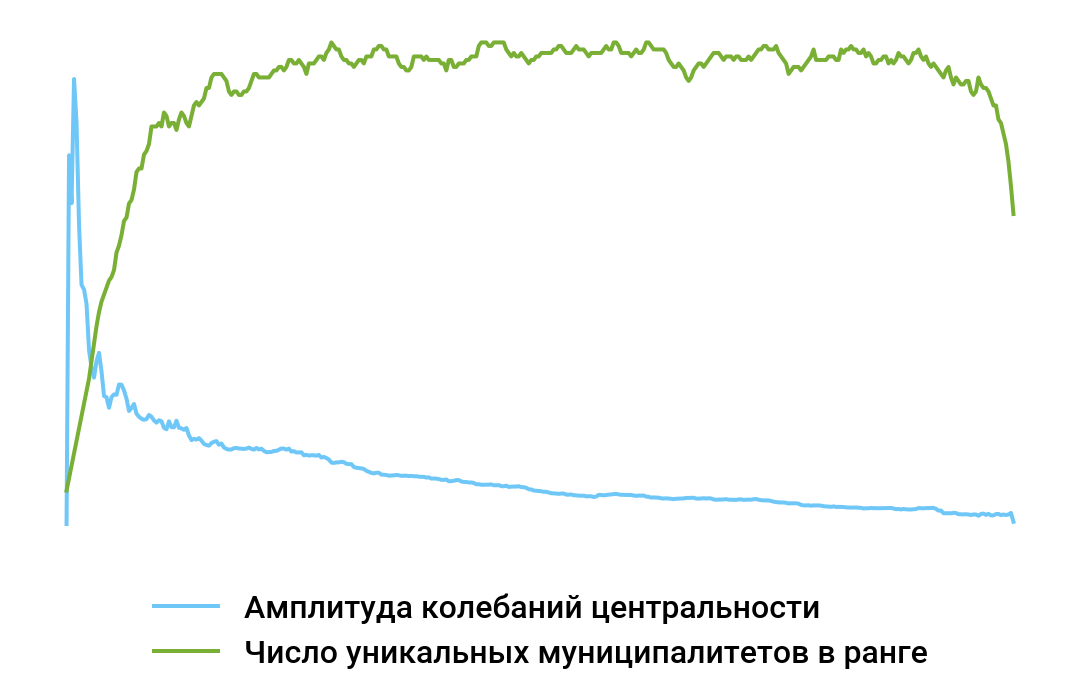

In [48]:
figure = plt.figure(figsize=(7,3.5), dpi = 192, facecolor = 'w')
plt.plot(df_plot.max_min_diff * 3.25, color = colors['blue'], label = 'Амплитуда колебаний центральности')
plt.plot(df_plot.nunique_communes / df_plot.nunique_communes.max(), color = colors['green'], label = 'Число уникальных муниципалитетов в ранге')

plt.xticks([], fontproperties = regluar_font)
plt.xlabel('Ранг', fontproperties = medium_font)

plt.yticks([],fontproperties = regluar_font)
figure.patch.set_visible('b')

plt.ylim(bottom = 0)
plt.axis('off')
# plt.xlabel('Ранг', fontproperties = medium_font)
# plt.ylabel('Амплитуда колебаний центральности\nЧисло уникальных муниципалитов', fontproperties = medium_font)

plt.legend(prop = medium_font, frameon = False, bbox_to_anchor = (.9,-0.075))
plt.grid()

Text(0, 0.5, 'Число уникальных муниципалитетов в ранге')

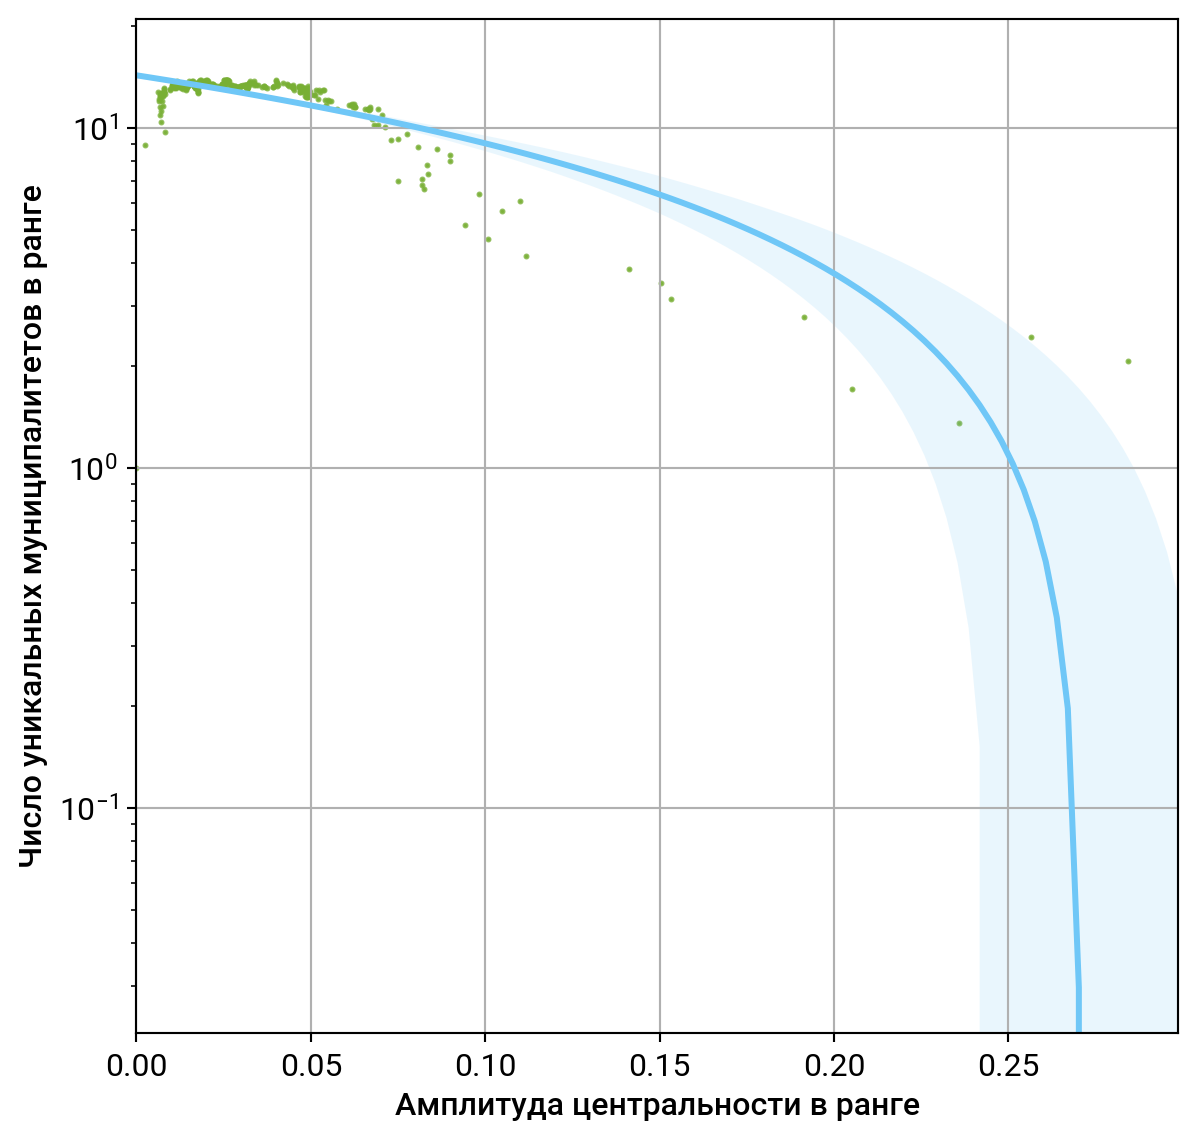

In [34]:
plt.figure(figsize = (7,7), dpi = 192)

sns.regplot(x = df_plot.max_min_diff, y = df_plot.nunique_communes, scatter_kws = {'s' : 1.5, 'color' : colors['green']},
            line_kws = {'color' : colors['blue']}
)
plt.yscale('log')
plt.grid()
plt.xlim(left = 0)

plt.xticks(fontproperties = regluar_font)
plt.xlabel('Амплитуда центральности в ранге', fontproperties = medium_font)

plt.yticks(fontproperties = regluar_font)
plt.ylabel('Число уникальных муниципалитетов в ранге', fontproperties = medium_font)